In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import timedelta

In [3]:
csv_url = r"C:\Users\GIA BAO\OneDrive - Trường ĐH CNTT - University of Information Technology\VCB-doan.csv"

In [4]:
data = pd.read_csv(csv_url, delimiter=';')

In [5]:
print(data)

            Date  Close   Open   High    Low    Vol  Change
0     07/12/2017  36089  36392  36392  35407  3.49M  -0.83%
1     08/12/2017  35672  36089  36089  35255  1.94M  -1.16%
2     11/12/2017  33815  34876  35558  33815  1.85M  -5.21%
3     12/12/2017  33891  34345  34421  31540  3.11M   0.22%
4     13/12/2017  33360  34118  34194  33132  1.50M  -1.57%
...          ...    ...    ...    ...    ...    ...     ...
1504  15/12/2023  82200  84000  84400  82200  2.53M  -2.61%
1505  18/12/2023  81500  82800  82900  81500  1.80M  -0.85%
1506  19/12/2023  81200  81500  81500  80100  1.96M  -0.37%
1507  20/12/2023  81100  81200  81300  80500  1.87M  -0.12%
1508  21/12/2023  80900  81000  81000  80300  2.03M  -0.25%

[1509 rows x 7 columns]


In [6]:
# Convert the 'Date' column to datetime with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

In [7]:
# Convert the data type of the 'Vol' and 'Change' columns
data['Vol'] = data['Vol'].str.replace('M', '').str.replace('K', '').astype(float)  # Convert 'M' to million and change the data type to float
data['Change'] = data['Change'].str.rstrip('%').astype(float) / 100.0  # Convert percentage to decimal number

In [8]:
# MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
# Split the data into Train-Val-Test sets with different ratios
# Ratio: 7:2:1
train_size_1 = int(0.7 * len(data))
test_size_1 = int(0.2 * len(data))
val_size_1 = len(data) - train_size_1 - test_size_1

train_1 = data[:train_size_1]
test_1 = data[train_size_1:train_size_1+test_size_1]
val_1 = data[train_size_1+test_size_1:]

#Ratio: 6:3:1
train_size_2 = int(0.6 * len(data))
test_size_2 = int(0.3 * len(data))
val_size_2 = len(data) - train_size_2 - test_size_2

train_2 = data[:train_size_2]
test_2 = data[train_size_2:train_size_2+test_size_2]
val_2 = data[train_size_2+test_size_2:]

#Ratio 5:3:2
train_size_3 = int(0.5 * len(data))
test_size_3 = int(0.3 * len(data))
val_size_3 = len(data) - train_size_3 - test_size_3

train_3 = data[:train_size_3]
test_3 = data[train_size_3:train_size_3+test_size_3]
val_3 = data[train_size_3+test_size_3:]

In [10]:
# Function to calculate RMSE, MAE, MAPE
def evaluate_model(train, test, val):
    exog_vars = ['Open', 'High', 'Low', 'Vol', 'Change']
    order = (1, 1, 1)

    # Build and train ARIMAX model on the training set
    model = SARIMAX(train['Close'], exog=train[exog_vars], order=order)
    results = model.fit(disp=False)

     # Predict on the validation and test set
    pred_test = results.get_forecast(steps=len(test), exog=test[exog_vars])
    pred_val = results.get_forecast(steps=len(val), exog=val[exog_vars])

    # Calculate evaluation metrics
    rmse_test = mean_squared_error(test['Close'], pred_test.predicted_mean, squared=False)
    mae_test = mean_absolute_error(test['Close'], pred_test.predicted_mean)
    mape_test = mean_absolute_percentage_error(test['Close'], pred_test.predicted_mean)

    rmse_val = mean_squared_error(val['Close'], pred_val.predicted_mean, squared=False)
    mae_val = mean_absolute_error(val['Close'], pred_val.predicted_mean)
    mape_val = mean_absolute_percentage_error(val['Close'], pred_val.predicted_mean)

    return rmse_test, mae_test, mape_test, rmse_val, mae_val, mape_val


In [11]:
# Evaluate the model with a ratio of 7:2:1
rmse_test_1, mae_test_1, mape_test_1, rmse_val_1, mae_val_1, mape_val_1 = evaluate_model(train_1, test_1, val_1)

# Evaluate the model with a ratio of 6:3:1
rmse_test_2, mae_test_2, mape_test_2, rmse_val_2, mae_val_2, mape_val_2 = evaluate_model(train_2, test_2, val_2)

# Evaluate the model with a ratio of 5:3:2
rmse_test_3, mae_test_3, mape_test_3, rmse_val_3, mae_val_3, mape_val_3 = evaluate_model(train_3, test_3, val_3)

C:\Users\GIA BAO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GIA BAO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GIA BAO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GIA BAO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction r

In [12]:
# Print result
print("Ratio 7:2:1")
print(f"RMSE Test: {rmse_test_1:.2f}, MAE Test: {mae_test_1:.2f}, MAPE Test: {mape_test_1:.2f}")
print(f"RMSE Validation: {rmse_val_1:.2f}, MAE Validation: {mae_val_1:.2f}, MAPE Validation: {mape_val_1:.2f}\n")

print("Ratio 6:3:1")
print(f"RMSE Test: {rmse_test_2:.2f}, MAE Test: {mae_test_2:.2f}, MAPE Test: {mape_test_2:.2f}")
print(f"RMSE Validation: {rmse_val_2:.2f}, MAE Validation: {mae_val_2:.2f}, MAPE Validation: {mape_val_2:.2f}\n")

print("Ratio 5:3:2")
print(f"RMSE Test: {rmse_test_3:.2f}, MAE Test: {mae_test_3:.2f}, MAPE Test: {mape_test_3:.2f}")
print(f"RMSE Validation: {rmse_val_3:.2f}, MAE Validation: {mae_val_3:.2f}, MAPE Validation: {mape_val_3:.2f}")

Ratio 7:2:1
RMSE Test: 592.67, MAE Test: 444.25, MAPE Test: 0.55
RMSE Validation: 517.79, MAE Validation: 354.89, MAPE Validation: 0.39

Ratio 6:3:1
RMSE Test: 601.73, MAE Test: 446.46, MAPE Test: 0.56
RMSE Validation: 498.11, MAE Validation: 349.16, MAPE Validation: 0.38

Ratio 5:3:2
RMSE Test: 548.88, MAE Test: 403.70, MAPE Test: 0.51
RMSE Validation: 623.73, MAE Validation: 457.88, MAPE Validation: 0.54


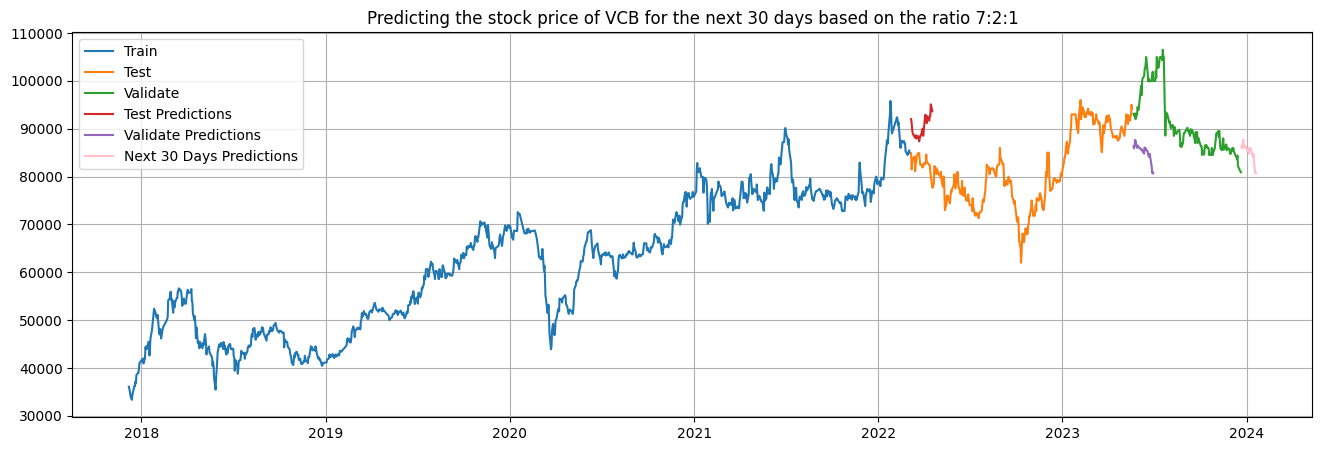

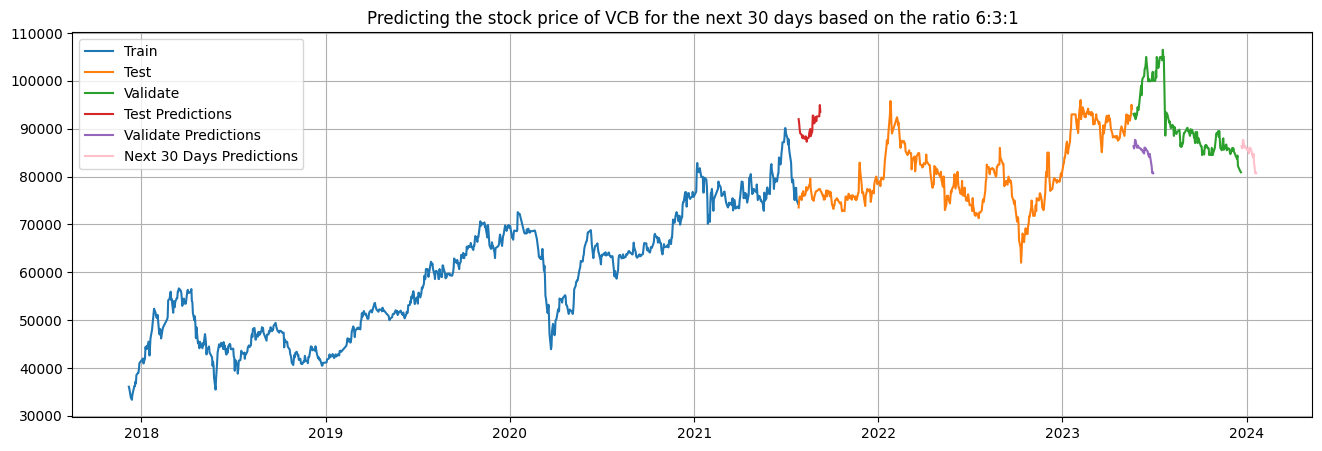

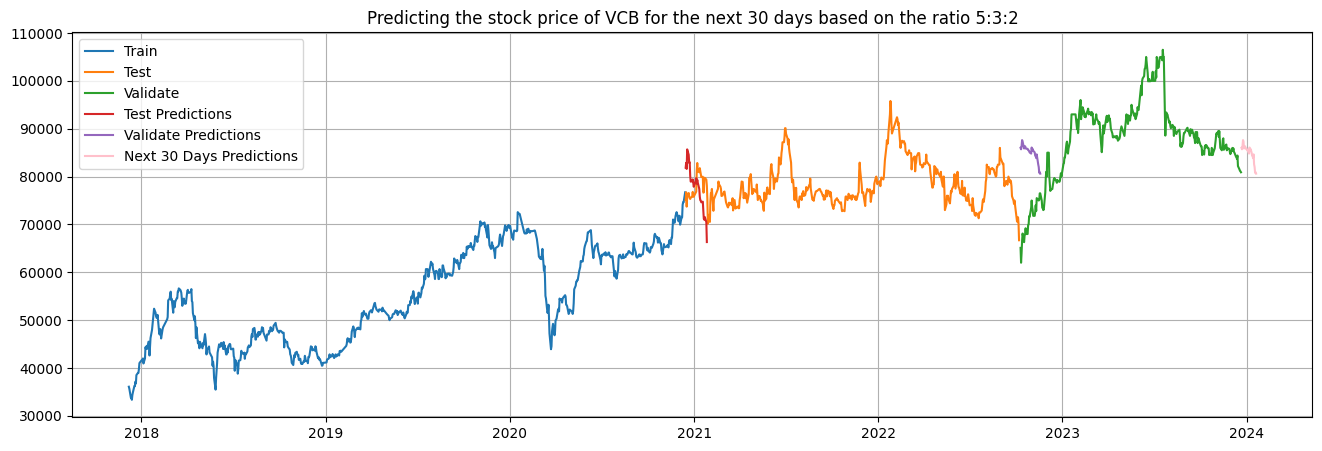

In [15]:
import matplotlib.pyplot as plt

# Function to predict the next 30 days
def predict_next_30_days(train, order, exog_vars):
    model = SARIMAX(train['Close'], exog=train[exog_vars], order=order)
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=30, exog=train[-30:][exog_vars])  # Using the last 30 days of the training set as exogenous variables
    return forecast.predicted_mean

# Plotting function for multiple ratios
def plot_all_predictions(train, test, val, y_pred_test, y_pred_val, y_next_30_days, ratio_label):
    plt.figure(figsize=(16, 5))
    plt.title(f"Predicting the stock price of VCB for the next 30 days based on the ratio {ratio_label}")
    plt.grid(True)
    
    # Plotting training, testing, and validation data
    plt.plot(train.index, train['Close'], label='Train')
    plt.plot(test.index, test['Close'], label='Test')
    plt.plot(val.index, val['Close'], label='Validate')

    # Plotting predictions for test and validation sets
    plt.plot(test.index[:len(y_pred_test)], y_pred_test, label='Test Predictions')
    plt.plot(val.index[:len(y_pred_val)], y_pred_val, label='Validate Predictions')

    # Plotting predictions for the next 30 days
    last_data = val.index[-1] + pd.DateOffset(1)  # Date for the first day of the next 30 days
    next_30_days_index = pd.date_range(last_data, periods=30)
    plt.plot(next_30_days_index, y_next_30_days, color="pink", label='Next 30 Days Predictions')

    plt.legend()
    plt.show()

# Plotting for all three ratios
plot_all_predictions(train_1, test_1, val_1, y_pred_test_1, y_pred_val_1, y_next_30_days_1, "7:2:1")
plot_all_predictions(train_2, test_2, val_2, y_pred_test_2, y_pred_val_2, y_next_30_days_2, "6:3:1")
plot_all_predictions(train_3, test_3, val_3, y_pred_test_3, y_pred_val_3, y_next_30_days_3, "5:3:2")
